<a href="https://colab.research.google.com/github/isa-ulisboa/greends-pml/blob/main/select_best_model_wine_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A difficult classification problem: the Portuguese wine quality data set

Some suggestions about how to read and processe this data set are available at
https://colab.research.google.com/drive/1XX6GidW1AqY5gBbdXsoRxQ84xnVcg6a9?usp=sharing#scrollTo=doH9_-gnf3sz

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


## Download and read the data

In [3]:
# URL of the white wine dataset
URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
# load the dataset from the URL
white_df = pd.read_csv(URL, sep=";")
# fill the `is_red` column with zeros.
white_df["is_red"] = 0 # YOUR CODE HERE
# keep only the first of duplicate items
white_df = white_df.drop_duplicates(keep='first')

In [4]:
# URL of the red wine dataset
URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
# load the dataset from the URL
red_df = pd.read_csv(URL, sep=";")
# fill the `is_red` column with ones.
red_df["is_red"] = 1 # YOUR CODE HERE
# keep only the first of duplicate items
red_df = red_df.drop_duplicates(keep='first')

In [5]:
df = pd.concat([red_df, white_df], ignore_index=True)
if False: df=df.loc[df['is_red']==1] # only reds
if True: df=df.loc[df['is_red']==0] # only whites

## Visualize and preprocess the data

The response variable is `quality`.

In [13]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
count,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.0
mean,6.830025,0.275743,0.335446,6.004751,0.046039,35.256846,138.130750,0.993843,3.194346,0.491205,10.558624,5.866922,0.0
std,0.845279,0.096687,0.121614,4.914591,0.022995,16.187532,42.239636,0.002914,0.150403,0.111821,1.201766,0.702019,0.0
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,5.000000,0.0
25%,6.300000,0.210000,0.270000,1.600000,0.036000,23.000000,107.000000,0.991680,3.100000,0.410000,9.500000,5.000000,0.0
50%,6.800000,0.260000,0.320000,4.800000,0.043000,33.500000,134.000000,0.993600,3.180000,0.480000,10.400000,6.000000,0.0
75%,7.300000,0.320000,0.390000,9.000000,0.050000,46.000000,167.000000,0.995800,3.290000,0.550000,11.400000,6.000000,0.0
max,14.200000,0.965000,1.660000,65.800000,0.346000,131.000000,344.000000,1.038980,3.820000,1.080000,14.200000,7.000000,0.0


In [ ]:
# TO DO: does the data set has NaN?

In [ ]:
# TO DO: what are the explanatory variables?

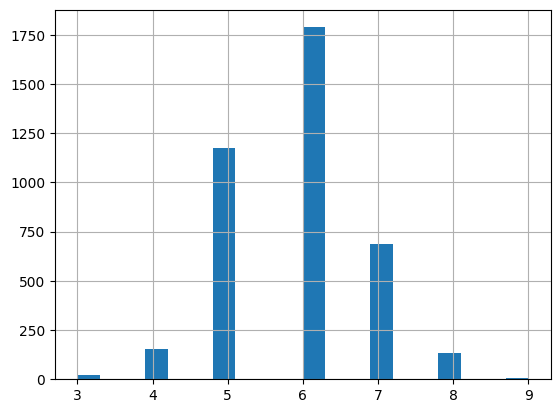

In [6]:
df['quality'].hist(bins=20);

In [7]:
# get data with wine quality greater than 4 and less than 8
df = df[(df['quality'] > 4) & (df['quality'] < 8)]

In [8]:
# Create features and target variables
X = df.drop(columns=['quality'])
y = df['quality']
classes=np.sort(y.unique())
classes


array([5, 6, 7])

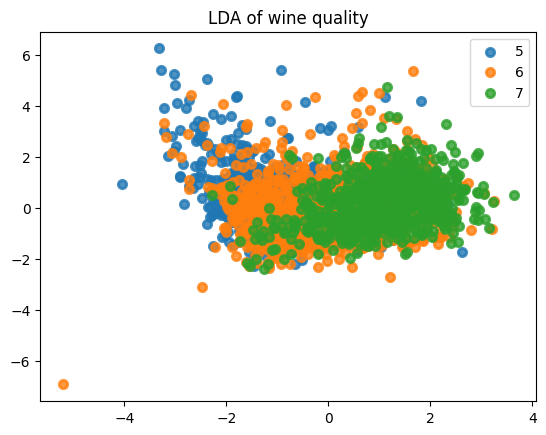

In [9]:
# Represent classes in the 1st discriminant plane:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r = lda.fit(X, y).transform(X)
colors = sns.color_palette(None, len(classes))
lw = 2
for color, cl in zip(colors, classes):
    plt.scatter(X_r[y == cl, 0], X_r[y == cl, 1], color=color, alpha=.8, lw=lw, label=cl)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of wine quality')
plt.show()

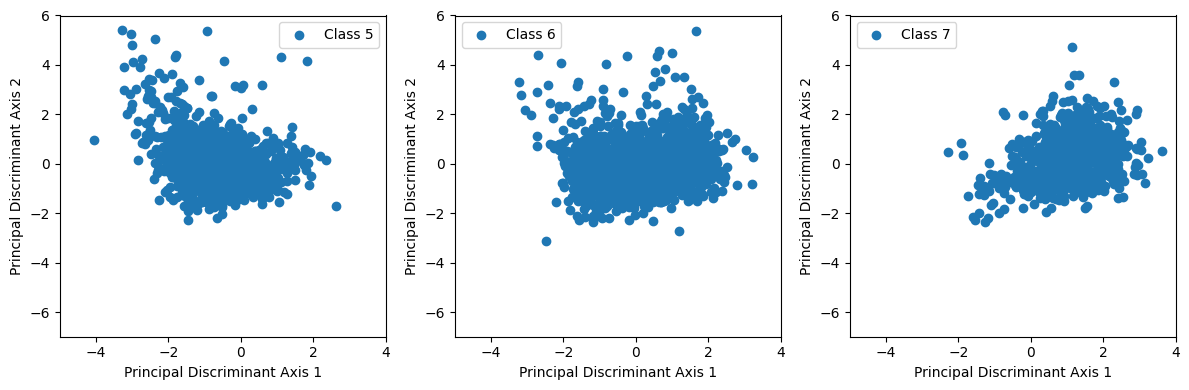

In [10]:
# Create separate subplots for each class
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Set the range for x-axis and y-axis in all subplots
for ax in axs.flat:
    ax.set_xlim(-5, 4)  # Replace xmin and xmax with your desired range for the x-axis
    ax.set_ylim(-7, 6)  # Replace ymin and ymax with your desired range for the y-axis


# Plot each class on a different subplot
for i in range(len(classes)):
    axs[i].scatter(X_r[y == classes[i], 0], X_r[y == classes[i], 1], label=f'Class {classes[i]}')
    axs[i].set_xlabel('Principal Discriminant Axis 1')
    axs[i].set_ylabel('Principal Discriminant Axis 2')
    axs[i].legend()

plt.tight_layout()
plt.show()

## Random Forest classifier

Next, we search for the best hyperparameters for a RF classifier with `RandomizedSearchCV`.

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()
# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Create a RandomizedSearchCV instance
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)
# Perform the random search
random_search.fit(X_train, y_train)
# Get the best hyperparameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_  # retrieve the best model
# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)
# Evaluate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)

Best Model Accuracy: 0.6196990424076607


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_pred=cross_val_predict(best_model, X, y, cv=5)
confusion_matrix(y,y_pred)

array([[ 631,  529,   15],
       [ 365, 1286,  137],
       [  23,  473,  193]])

## Multiple layer perceptron (NN) 

The search for a good architecture is done with `GridSearchCV`.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# define and train classifier
clf = MLPClassifier(solver='adam',hidden_layer_sizes=(128,128, 128, 1), max_iter=1000,learning_rate_init=0.01,momentum=0.9, activation='relu')
clf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = clf.predict(X_test)
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4829001367989056


In [ ]:

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(128,64,32), (128, 64), (64,32)],
    'activation': ['relu'],
    'solver': [ 'adam'],
    'learning_rate': [ 'adaptive'],
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
print(best_params)
print(grid_search.cv_results_['mean_test_score'])
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)

{'activation': 'relu', 'hidden_layer_sizes': (128, 64, 32), 'learning_rate': 'adaptive', 'solver': 'adam'}
[0.55597647 0.54878527 0.54434024]
Best Model Accuracy: 0.5622435020519836


In [ ]:
print(best_params)
print(grid_search.cv_results_['mean_test_score'])

{'activation': 'relu', 'hidden_layer_sizes': (128, 64), 'learning_rate': 'adaptive', 'solver': 'adam'}
[0.53852242 0.55768997 0.5350925 ]


## XGBoost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the hyperparameters for XGBoost
params = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'max_depth': 3,
    'eta': 0.1,
    'gamma': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

# Train the XGBoost model
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the test set
y_pred = xgb_model.predict(dtest)

# Convert the predicted labels to integers
y_pred = y_pred.astype(int)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

XGBoostError: ignored